<a href="https://colab.research.google.com/github/TristanLeclair/COMP551Colab/blob/main/Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('ENB2012_data.xlsx')
df.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


In [3]:
df.tail(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [4]:
df.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


# Cleanup

## Normalize Data

In [5]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

normedDf = df.copy()

norm_X = df.iloc[:, 0:8]
norm_Y1 = df[["Y1"]]
norm_Y2 = df[["Y2"]]

norm_X = sx.fit_transform(norm_X)
norm_Y1 = sy1.fit_transform(norm_Y1)
norm_Y2 = sy2.fit_transform(norm_Y2)

normedDf = pd.concat([pd.DataFrame(norm_X), pd.DataFrame(norm_Y1), pd.DataFrame(norm_Y2)], axis=1)
normedDf.columns = df.columns
normedDf

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


In [6]:
norm_X = normedDf.iloc[:, 0:8]
norm_Y1 = normedDf[["Y1"]]
norm_Y2 = normedDf[["Y2"]]

### Final dataframes

In [7]:
norm_X

,X1,X2,X3,X4,X5,X6,X7,X8
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


In [8]:
norm_Y1

,Y1
0,0.257212
1,0.257212
2,0.257212
3,0.257212
4,0.399838
...,...
763,0.320032
764,0.283904
765,0.281208
766,0.282286


In [9]:
norm_Y2

,Y2
0,0.280905
1,0.280905
2,0.280905
3,0.280905
4,0.468085
...,...
763,0.282790
764,0.161056
765,0.167250
766,0.153784


In [10]:
normedDf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,0.439396,0.368644
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,0.272046,0.256216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,0.188258,0.127121
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,0.348881,0.301104
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,0.691763,0.598775
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Select K best attributes

Import method

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression

Get selection scores

In [12]:
selector_Y1 = SelectKBest(f_regression, k='all')
df_selected_Y1 = selector_Y1.fit_transform(norm_X, np.ravel(norm_Y1))
selector_Y2 = SelectKBest(f_regression, k='all')
df_selected_Y2 = selector_Y2.fit_transform(norm_X, np.ravel(norm_Y2))

### Sort k best for Y1

In [13]:
scores_Y1 = selector_Y1.scores_[selector_Y1.get_support()]
x_names = norm_X.columns.values[selector_Y1.get_support()]
names_scores_Y1 = list(zip(x_names, scores_Y1))
ns_df_Y1 = pd.DataFrame(data=names_scores_Y1, columns=['Feat_names', 'F_scores'])
ns_df_sorted_Y1 = ns_df_Y1.sort_values(['F_scores', 'Feat_names'], ascending=[False, True])
ns_df_sorted_Y1

,Feat_names,F_scores
4,X5,2900.590178
3,X4,2211.620312
1,X2,585.260349
0,X1,484.045616
2,X3,200.727893
6,X7,60.156178
7,X8,5.892043
5,X6,0.005126


In [14]:
k_best_cols_Y1 = ns_df_sorted_Y1.head(4).iloc[:,0].values
X_best_Y1 = norm_X[k_best_cols_Y1]
X_best_Y1

,X5,X4,X2,X1
0,1.0,0.000000,0.000000,1.000000
1,1.0,0.000000,0.000000,1.000000
2,1.0,0.000000,0.000000,1.000000
3,1.0,0.000000,0.000000,1.000000
4,1.0,0.111111,0.166667,0.777778
...,...,...,...,...
763,0.0,1.000000,0.916667,0.055556
764,0.0,1.000000,1.000000,0.000000
765,0.0,1.000000,1.000000,0.000000
766,0.0,1.000000,1.000000,0.000000


In [15]:
df_k_best_Y1 = pd.concat([X_best_Y1, norm_Y1], axis=1)
df_k_best_Y1

,X5,X4,X2,X1,Y1
0,1.0,0.000000,0.000000,1.000000,0.257212
1,1.0,0.000000,0.000000,1.000000,0.257212
2,1.0,0.000000,0.000000,1.000000,0.257212
3,1.0,0.000000,0.000000,1.000000,0.257212
4,1.0,0.111111,0.166667,0.777778,0.399838
...,...,...,...,...,...
763,0.0,1.000000,0.916667,0.055556,0.320032
764,0.0,1.000000,1.000000,0.000000,0.283904
765,0.0,1.000000,1.000000,0.000000,0.281208
766,0.0,1.000000,1.000000,0.000000,0.282286


### Sort k best for Y2

In [16]:
scores_Y2 = selector_Y2.scores_[selector_Y2.get_support()]
x_names = norm_X.columns.values[selector_Y2.get_support()]
names_scores_Y2 = list(zip(x_names, scores_Y2))
ns_df_Y2 = pd.DataFrame(data=names_scores_Y2, columns=['Feat_names', 'F_scores'])
ns_df_sorted_Y2 = ns_df_Y2.sort_values(['F_scores', 'Feat_names'], ascending=[False, True])
ns_df_sorted_Y2

,Feat_names,F_scores
4,X5,3111.127823
3,X4,2226.031391
1,X2,634.180214
0,X1,515.763924
2,X3,170.921606
6,X7,34.466755
7,X8,1.960440
5,X6,0.156443


In [17]:
k_best_cols_Y2 = ns_df_sorted_Y2.head(4).iloc[:,0].values
X_best_Y2 = norm_X[k_best_cols_Y2]
X_best_Y2

,X5,X4,X2,X1
0,1.0,0.000000,0.000000,1.000000
1,1.0,0.000000,0.000000,1.000000
2,1.0,0.000000,0.000000,1.000000
3,1.0,0.000000,0.000000,1.000000
4,1.0,0.111111,0.166667,0.777778
...,...,...,...,...
763,0.0,1.000000,0.916667,0.055556
764,0.0,1.000000,1.000000,0.000000
765,0.0,1.000000,1.000000,0.000000
766,0.0,1.000000,1.000000,0.000000


In [18]:
df_k_best_Y2 = pd.concat([X_best_Y2, norm_Y2], axis=1)
df_k_best_Y2

,X5,X4,X2,X1,Y2
0,1.0,0.000000,0.000000,1.000000,0.280905
1,1.0,0.000000,0.000000,1.000000,0.280905
2,1.0,0.000000,0.000000,1.000000,0.280905
3,1.0,0.000000,0.000000,1.000000,0.280905
4,1.0,0.111111,0.166667,0.777778,0.468085
...,...,...,...,...,...
763,0.0,1.000000,0.916667,0.055556,0.282790
764,0.0,1.000000,1.000000,0.000000,0.161056
765,0.0,1.000000,1.000000,0.000000,0.167250
766,0.0,1.000000,1.000000,0.000000,0.153784


### Results

We've now created 2 new dataFrames containing the values that best fit both `Y1` and `Y2`
Stored in `df_k_best_Y1` and `df_k_best_Y2`

## Select train and test data

In [19]:
selectTrain = lambda df,frac,random_state : df.sample(frac=frac, random_state=random_state)

In [20]:
trainData_raw = selectTrain(df=df,frac=0.8, random_state=26)
testData_raw = df.drop(trainData_raw.index)
trainData = selectTrain(df=normedDf,frac=0.8,random_state=26)
testData = normedDf.drop(trainData.index)
trainData_k_best_Y1 = selectTrain(df=df_k_best_Y1, frac=0.8, random_state=26)
testData_k_best_Y1 = normedDf.drop(trainData.index)
trainData_k_best_Y2 = selectTrain(df=df_k_best_Y2, frac=0.8, random_state=26)
testData_k_best_Y2 = normedDf.drop(trainData.index)

In [21]:
print(trainData.iloc[:, 0:8].shape, trainData[["Y1"]].shape)

(614, 8) (614, 1)


In [22]:
X = trainData.iloc[:, 0:8]
Y1 = trainData[["Y1"]]
Y2 = trainData[["Y2"]]
X_raw = trainData_raw.iloc[:, 0:8]
Y1_raw = trainData_raw[["Y1"]]
Y2_raw = trainData_raw[["Y2"]]
k_best_X_Y1 = trainData_k_best_Y1.iloc[:, 0:4]
k_best_Y1 = trainData_k_best_Y1[["Y1"]]
k_best_X_Y2 = trainData_k_best_Y2.iloc[:, 0:4]
k_best_Y2 = trainData[["Y2"]]

# Useful methods

In [23]:
sse = lambda pred, actual: 0.5 *  np.mean((pred - actual)**2, axis=0)

# Linear Regression

## Implementation

In [24]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        print(x.shape, y.shape)
        self.w = np.linalg.lstsq(x, y, rcond=-1)[0]          #return w for the least square difference
        self.cost = .5*np.mean((np.dot(x,self.w) - y)**2, axis=None)
        return self
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

## Run

Fit model to normalized training Data

In [25]:
lin_Y1 = LinearRegression()
lin_Y1.fit(X, Y1)
lin_Y1.w

(614, 9) (614, 1)


array([[-6.11555297e-01],
       [-1.18726163e+13],
       [ 6.92569283e+12],
       [ 8.90446221e+12],
       [ 4.07226562e-01],
       [-9.76562500e-04],
       [ 2.12402344e-01],
       [ 2.97851562e-02],
       [-1.97876938e+12]])

In [26]:
lin_Y2 = LinearRegression()
lin_Y2.fit(X, Y2)
lin_Y2.w

(614, 9) (614, 1)


array([[-6.82196415e-01],
       [-2.44752477e+13],
       [ 1.42772278e+13],
       [ 1.83564358e+13],
       [ 4.04296875e-01],
       [-1.95312500e-03],
       [ 1.63085938e-01],
       [ 7.81250000e-03],
       [-4.07920795e+12]])

In [27]:
lin_Y1.cost

Y1    0.003263
dtype: float64

In [28]:
lin_Y2.cost

Y2    0.003873
dtype: float64

### Run with raw data

In [29]:
lin_raw_Y1 = LinearRegression()
lin_raw_Y1.fit(X_raw, Y1_raw)
lin_raw_Y1.w

(614, 9) (614, 1)


array([[-6.37780536e+01],
       [-6.75368106e+11],
       [ 6.75368106e+11],
       [ 1.35073621e+12],
       [ 4.30225801e+00],
       [ 3.69882584e-02],
       [ 1.94037033e+01],
       [ 2.32472181e-01],
       [ 7.95783927e+01]])

In [30]:
lin_raw_Y2 = LinearRegression()
lin_raw_Y2.fit(X_raw, Y2_raw)
lin_raw_Y2.w

(614, 9) (614, 1)


array([[-7.18587758e+01],
       [-1.31223551e+12],
       [ 1.31223551e+12],
       [ 2.62447102e+12],
       [ 4.26700974e+00],
       [ 1.94096565e-01],
       [ 1.45264696e+01],
       [ 8.81190300e-02],
       [ 9.73851247e+01]])

### Run with k-best data

In [31]:
lin_k_best_Y1 = LinearRegression()
lin_k_best_Y1.fit(k_best_X_Y1, k_best_Y1)
lin_k_best_Y1.w

(614, 5) (614, 1)


array([[ 0.41271656],
       [-0.33284617],
       [-0.32186018],
       [-0.73861923],
       [ 0.89949335]])

In [32]:
lin_k_best_Y2 = LinearRegression()
lin_k_best_Y2.fit(k_best_X_Y2, k_best_Y2)
lin_k_best_Y2.w

(614, 5) (614, 1)


array([[ 0.41223209],
       [-0.24656407],
       [-0.44145115],
       [-0.77565024],
       [ 0.85534435]])

## Results/Testing

Test normalized

In [33]:
errors=[]

In [34]:
testX_Y1 = testData.iloc[:, 0:8].copy()
predictions_Y1 = lin_Y1.predict(testX_Y1)

In [35]:
error_lin_Y1 = sse(pred=predictions_Y1, actual=testData[["Y1"]])
errors.append(('Y1',float(error_lin_Y1.to_string(index=False))))
error_lin_Y1.to_string(index=False)

'0.002746'

In [36]:
testX_Y2 = testData.iloc[:, 0:8].copy()
lin_Y2_pred = lin_Y2.predict(testX_Y2)
error_lin_Y2 = sse(pred=lin_Y2_pred, actual=testData[["Y1"]])
errors.append(('Y2',float(error_lin_Y2.to_string(index=False))))
error_lin_Y2.to_string(index=False)

'0.007223'

Test raw

In [37]:
testX_raw = testData_raw.iloc[:, 0:8].copy()
lin_raw_Y1_pred = lin_raw_Y1.predict(testX_raw)
error_lin_raw_Y1 = sse(pred=lin_raw_Y1_pred, actual=testData_raw[["Y1"]])
errors.append(('Y1 raw',float(error_lin_raw_Y1.to_string(index=False))))
error_lin_raw_Y1.to_string(index=False)

'3.785707'

In [38]:
testX_raw = testData_raw.iloc[:, 0:8].copy()
lin_raw_Y2_pred = lin_raw_Y2.predict(testX_raw)
error_lin_raw_Y2 = sse(pred=lin_raw_Y2_pred, actual=testData_raw[["Y2"]])
errors.append(('Y2 raw',float(error_lin_raw_Y2.to_string(index=False))))
error_lin_raw_Y2.to_string(index=False)

'5.495266'

Test k best

In [39]:
test_X_k_best = testData_k_best_Y1.iloc[:, 0:4].copy()
lin_k_best_Y1_pred = lin_k_best_Y1.predict(test_X_k_best)
error_lin_k_best_Y1 = sse(pred=lin_k_best_Y1_pred, actual=testData_k_best_Y1[["Y1"]])
errors.append(('Y1 k best',float(error_lin_k_best_Y1.to_string(index=False))))
error_lin_k_best_Y1.to_string(index=False)

'0.080057'

In [40]:
test_X_k_best = testData_k_best_Y2.iloc[:, 0:4].copy()
lin_k_best_Y2_pred = lin_k_best_Y2.predict(test_X_k_best)
error_lin_k_best_Y2 = sse(pred=lin_k_best_Y2_pred, actual=testData_k_best_Y2[["Y2"]])
errors.append(('Y2 k best',float(error_lin_k_best_Y2.to_string(index=False))))
error_lin_k_best_Y2.to_string(index=False)

'0.081678'

In [41]:
[x[1] for x in errors]

[0.002746, 0.007223, 3.785707, 5.495266, 0.080057, 0.081678]

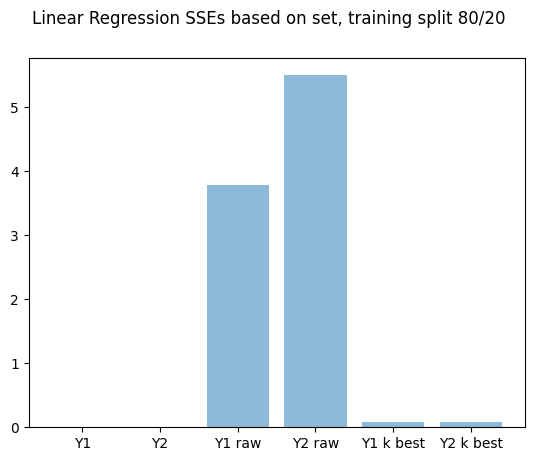

In [42]:
y_pos = np.arange(len(errors))
plt.bar(y_pos, [x[1] for x in errors], align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in errors])
plt.suptitle('Linear Regression SSEs based on set, training split 80/20')
plt.show()

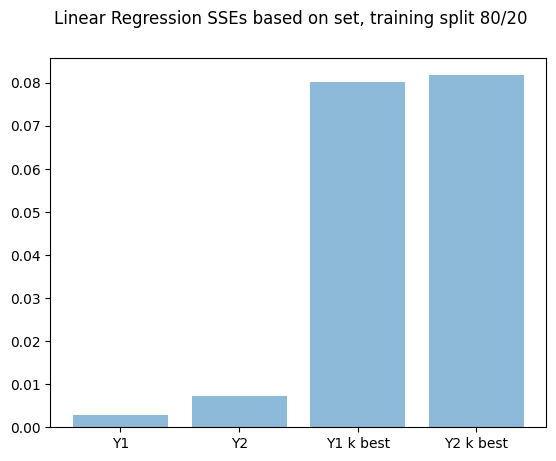

In [43]:
ignore_raw = list(filter(lambda x : not 'raw' in x[0], errors))
y_pos = np.arange(len(ignore_raw))
plt.bar(y_pos, [x[1] for x in ignore_raw], align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in ignore_raw])
plt.suptitle('Linear Regression SSEs based on set, training split 80/20')
plt.show()

## Plotting

### Our implementation

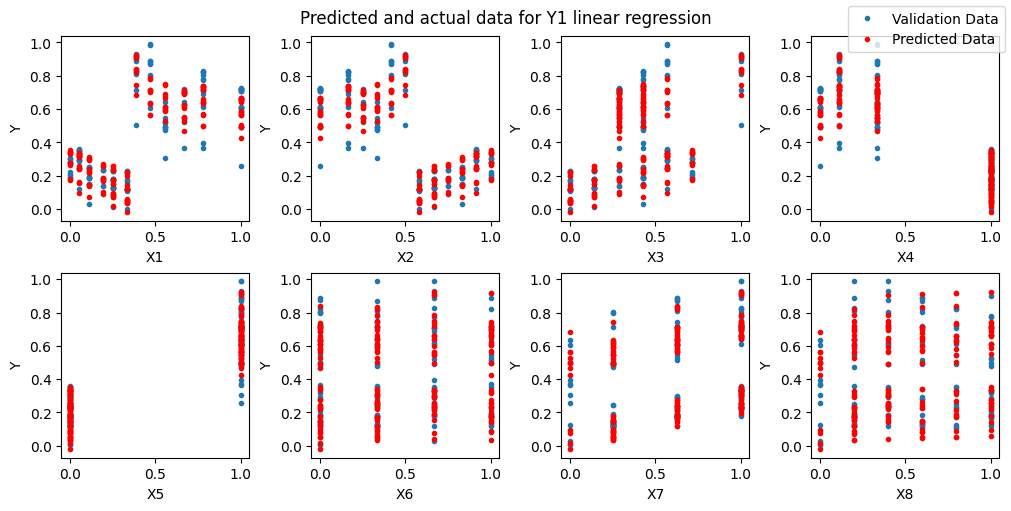

In [44]:
fig, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(10,5))
slopes = lin_Y1.w[0:-1]
fig.suptitle("Predicted and actual data for Y1 linear regression")
line1 = []
line2 = []
for ax, col, slope in zip(axes.flat, testX_Y1, slopes):
    line_a, = ax.plot(testX_Y1[col], testData[["Y1"]], '.')
    line_b, = ax.plot(testX_Y1[col], predictions_Y1, '.', color='r')
    ax.set_xlabel('{axe}'.format(axe=col))
    ax.set_ylabel('Y')
fig.legend((line_a, line_b), ('Validation Data', 'Predicted Data'))
fig.savefig('pred_slopes_lin_reg')

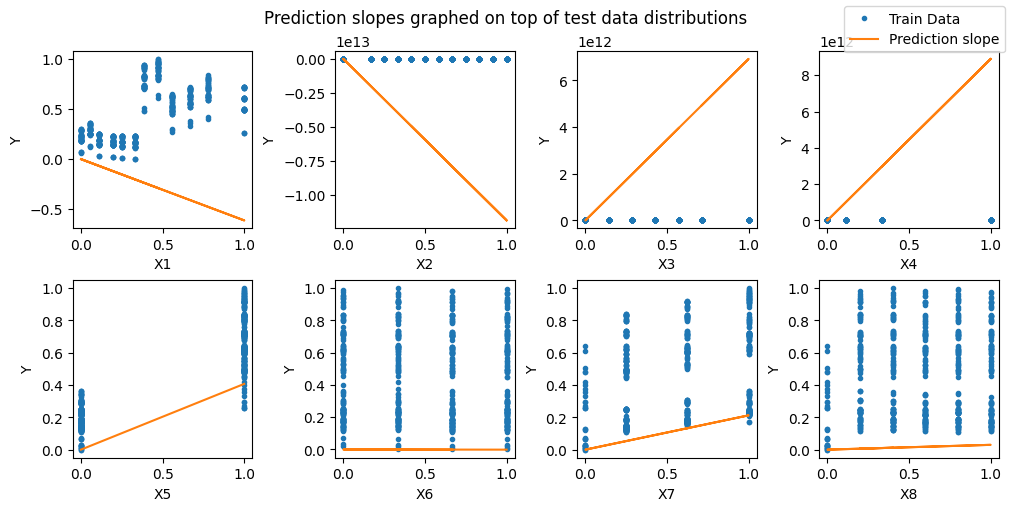

In [45]:
fig, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(10,5))
slopes = lin_Y1.w[0:-1]
fig.suptitle("Prediction slopes graphed on top of test data distributions")
for ax, col, slope in zip(axes.flat, X, slopes):
    line_a, = ax.plot(X[col], trainData[["Y1"]], '.')
    line_b,  = ax.plot(X[col], slope*X[col], '-')
    ax.set_xlabel('{axe}'.format(axe=col))
    ax.set_ylabel('Y')
fig.legend((line_a, line_b), ('Train Data', 'Prediction slope'))

### Compare with Sklearn's version

In [46]:
from sklearn.linear_model import LinearRegression as linreg

ln = linreg()

ln.fit(X, Y1)
modPred = ln.predict(testX_Y1)
ln.coef_

array([[-6.11555297e-01, -7.70904980e+12,  4.49694572e+12,
         5.78178735e+12,  4.20410156e-01, -2.20870972e-03,
         2.13230133e-01,  4.25567627e-02]])

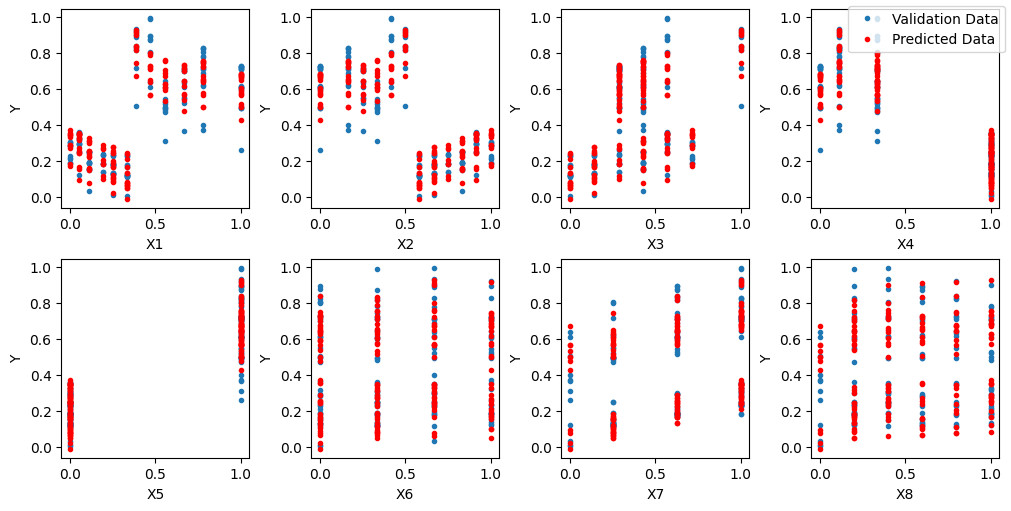

In [47]:
fig, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(10,5))
slopes = ln.coef_
for ax, col, slope in zip(axes.flat, testX_Y1, slopes.flat):
    line_a, = ax.plot(testX_Y1[col], testData[["Y1"]], '.')
    line_b, = ax.plot(testX_Y1[col], modPred, '.', color='r')
    ax.set_xlabel('{axe}'.format(axe=col))
    ax.set_ylabel('Y')
fig.legend((line_a, line_b), ('Validation Data', 'Predicted Data'))

# Minibatch SGD Linear Regression

## Implementation

In [48]:
class SGD_LinearRegression:
    def __init__(self, add_bias=True, epochs=15, record_history=True):
        self.add_bias = add_bias
        self.epochs = epochs
        self.record_history = record_history
        if self.record_history:
            self.cost_history = []
        pass
    
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        N, D = x.shape
        def gradient(x, y, w):
            yh = x @ w
            N, D = x.shape
            grad = .5*np.dot(x.T, yh - y)/N
            np.set_printoptions(suppress=True)
            return grad
        self.w = np.zeros((x.shape[1], 1))
        max_iters = self.epochs
        # Loop over all data for the number of epochs
        currEpoch = 0
        for itr in range(max_iters):
            self.w = optimizer.run(gradient, x, y, self.w)
            if self.record_history:
                cost = .5*np.mean((np.dot(x,self.w) - y)**2, axis=None)
                self.cost_history.append(float(cost.to_string(index=False)))
            
            
            # print('Epoch {0}, batches: {1}'.format(itr, len(mini_batches)))
        self.final_cost = cost
        return self
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

In [49]:
class MiniBatch_SGD_LinearRegression:
    def __init__(self, add_bias=True, batch_size=32, epochs=15, record_history=True):
        self.add_bias = add_bias
        self.batch_size = batch_size
        self.epochs = epochs
        self.record_history = record_history
        if self.record_history:
            self.cost_history = []
        pass
    
    def fit(self, x, y, optimizer, create_mini_batches):
        if x.ndim == 1:
            x = x[:, None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        N, D = x.shape
        def gradient(x, y, w):
            yh = x @ w
            N, D = x.shape
            grad = .5*np.dot(x.T, yh - y)/N
            np.set_printoptions(suppress=True)
            return grad
        self.w = np.zeros((x.shape[1], 1))
        max_iters = self.epochs
        # Loop over all data for the number of epochs
        currEpoch = 0
        for itr in range(max_iters):
            mini_batches = create_mini_batches(x, y, self.batch_size)
            # For each mini batch, run SGD
            for mini_batch in mini_batches:
                x_mini, y_mini = mini_batch
                self.w = optimizer.run(gradient, x_mini, y_mini, self.w)
                if self.record_history:
                    cost = .5*np.mean((np.dot(x,self.w) - y)**2, axis=None)
                    self.cost_history.append(float(cost.to_string(index=False)))
            
            
            # print('Epoch {0}, batches: {1}'.format(itr, len(mini_batches)))
        self.final_cost = cost
        return self
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

In [50]:
class GradientDescent:
    
    def __init__(self, learning_rate=1e-6, max_iters=1e3, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.num = 0
            self.w_history = []                 #to store the weight history for visualization
            self.num_history = []               #to store the iteration history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
                self.num_history.append(self.num)
                self.num += 1
            t += 1
        return w


In [51]:
def create_mini_batches(x, y, batch_size):
    mini_batches = []
    data = np.hstack((x,y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i+1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

## Run

Fit model with normalized data

Save gradients and costs for plotting

In [52]:
w_histories = []
costs = []
descriptions = []

In [53]:
sgd_Y1 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=2)
grad_Y1 = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd_Y1.fit(X, Y1, grad_Y1, create_mini_batches)
w_histories.append(grad_Y1.w_history)
costs.append(sgd_Y1.cost_history)
descriptions.append('Minibatch SGD on Y1 normalized')

In [54]:
sgd_Y2 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=2)
grad_Y2 = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd_Y2.fit(X, Y2, grad_Y2, create_mini_batches)
w_histories.append(grad_Y2.w_history)
costs.append(sgd_Y2.cost_history)
descriptions.append('Minibatch SGD on Y2 normalized')

Run with k best

In [55]:
w_histories_k_best = []
costs_k_best = []
descriptions_k_best = []

In [56]:
sgd_k_best_Y1 = MiniBatch_SGD_LinearRegression(batch_size=16,epochs=2)
grad_k_best_Y1 = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd_k_best_Y1.fit(k_best_X_Y1, k_best_Y1, grad_k_best_Y1, create_mini_batches)
w_histories_k_best.append(grad_k_best_Y1.w_history)
costs_k_best.append(sgd_k_best_Y1.cost_history)
descriptions_k_best.append('Minibatch SGD on K best\nparameters for Y1 normalized')

In [57]:
sgd_k_best_Y2 = MiniBatch_SGD_LinearRegression(batch_size=16,epochs=2)
grad_k_best_Y2 = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd_k_best_Y2.fit(k_best_X_Y2, k_best_Y2, grad_k_best_Y2, create_mini_batches)
w_histories_k_best.append(grad_k_best_Y2.w_history)
costs_k_best.append(sgd_k_best_Y2.cost_history)
descriptions_k_best.append('Minibatch SGD on K best\nparameters for Y2 normalized')

Run with raw data

In [58]:
w_histories_raw = []
costs_raw = []
descriptions_raw = []

In [59]:
sgd_raw_Y1 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=2)
grad_raw_Y1 = GradientDescent(max_iters=2, learning_rate=1e-4, record_history=True, epsilon=1e-8)
sgd_raw_Y1.fit(X_raw, Y1_raw, grad_raw_Y1, create_mini_batches)
w_histories_raw.append(grad_raw_Y1.w_history)
costs_raw.append(sgd_raw_Y1.cost_history)
descriptions_raw.append('Minibatch SGD on raw parameters for Y1')

In [60]:
sgd_raw_Y2 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=2)
grad_raw_Y2 = GradientDescent(max_iters=2, learning_rate=1e-4, record_history=True, epsilon=1e-8)
sgd_raw_Y2.fit(X_raw, Y2_raw, grad_raw_Y2, create_mini_batches)
w_histories_raw.append(grad_raw_Y2.w_history)
costs_raw.append(sgd_raw_Y2.cost_history)
descriptions_raw.append('Minibatch SGD on raw parameters for Y2')

In [61]:
w_hists_list = [w_histories, w_histories_k_best, w_histories_raw]
costs_list = [costs, costs_k_best, costs_raw]
descriptions_list = [descriptions, descriptions_k_best, descriptions_raw]

## Plotting

In [62]:
from matplotlib.pyplot import cm

def plotGradients(w_histories_grad, cost_histories_batch, descriptions):
    
    # w_histories_grad is an array of w_history_grad
    # w_history_grad are arrays of gradients
    # gradients are array of numbers
    
    num_of_params = len(w_histories_grad[0][0])
    num_rows = 2
    num_cols = num_of_params // num_rows
    fig_w, axes_w = plt.subplots(ncols=num_cols, nrows=num_rows, constrained_layout=True, figsize=(10,5))
    fig_w.suptitle('Weights over iterations in gradient descent', x=0.25)
    
    fig_cost, axes_cost = plt.subplots(ncols=2, nrows=1, constrained_layout=True)
    fig_cost.suptitle('Cost values over batch iterations', x=0.25)
    
    if not len(w_histories_grad) == len(cost_histories_batch):
        raise Exception('History lists must be of same length (same number of minibatches)')
    
    colors = cm.rainbow(np.linspace(0.1, 1, len(w_histories_grad)))
    colorLines = []
    
    # 1 color per gradient graph
    for w_history_grad, cost_history_batch, color in zip(w_histories_grad, cost_histories_batch, colors):
        w_over_time_grad = np.array(w_history_grad)
        cost_over_time_batch= np.array(cost_history_batch)
        graphNum = 0
        last_line = 0 # used to store last line and save at then of loop
        for ax in axes_cost.flat:
            nums = np.arange(1, len(cost_over_time_batch) + 1)
            line, = ax.plot(nums, cost_over_time_batch, color=color)
            ax.set_xlabel('number of batches run')
            graphNum += 1
            ax.set_ylabel('cost'.format(axe=graphNum))
        
        graphNum = 0
        hist_num = 0
        for ax, w in zip(axes_w.flat, w_over_time_grad.T[0]):
            nums = np.arange(1, len(w) + 1)
            last_line, = ax.plot(nums, w, color=color)
            ax.set_xlabel('number of iterations')
            graphNum += 1
            ax.set_ylabel('w{axe} gradient'.format(axe=graphNum))
            hist_num += 1
            
        colorLines.append(last_line)
            
    fig_w.legend(colorLines, descriptions)
    fig_cost.legend(colorLines, descriptions)
    fig_w.savefig('test_w')
    fig_cost.savefig('test_cost')

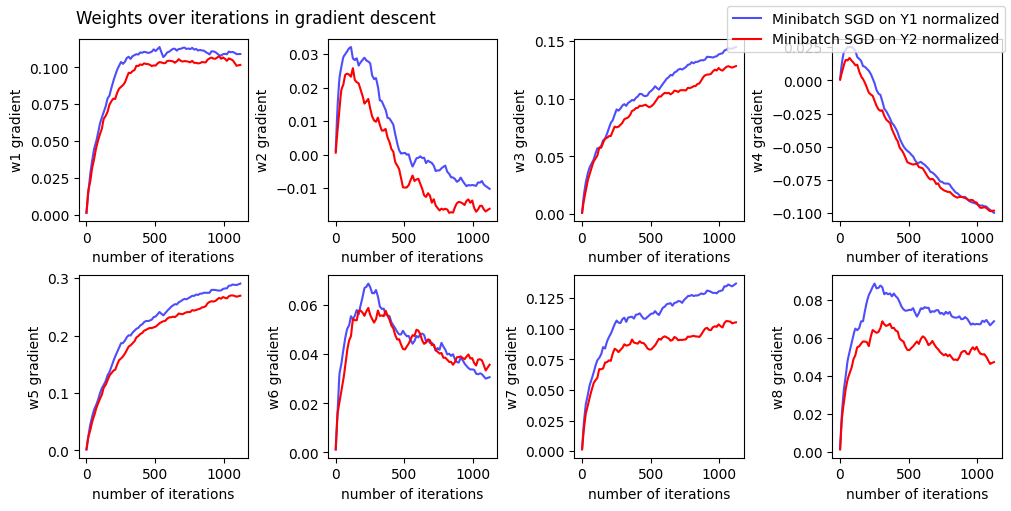

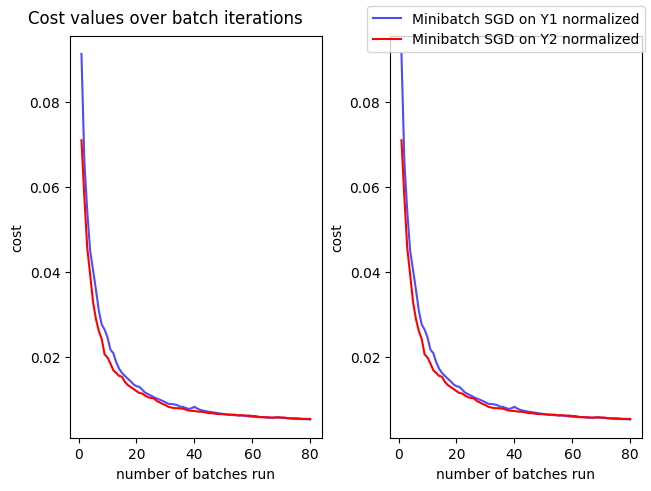

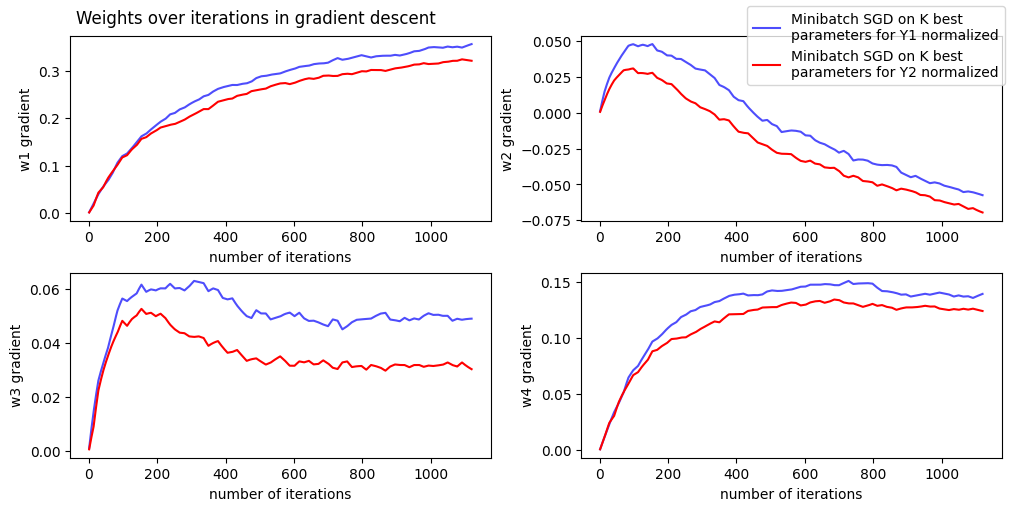

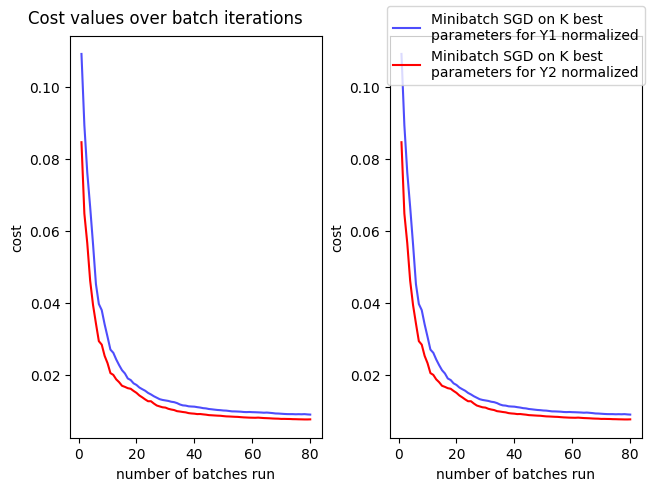

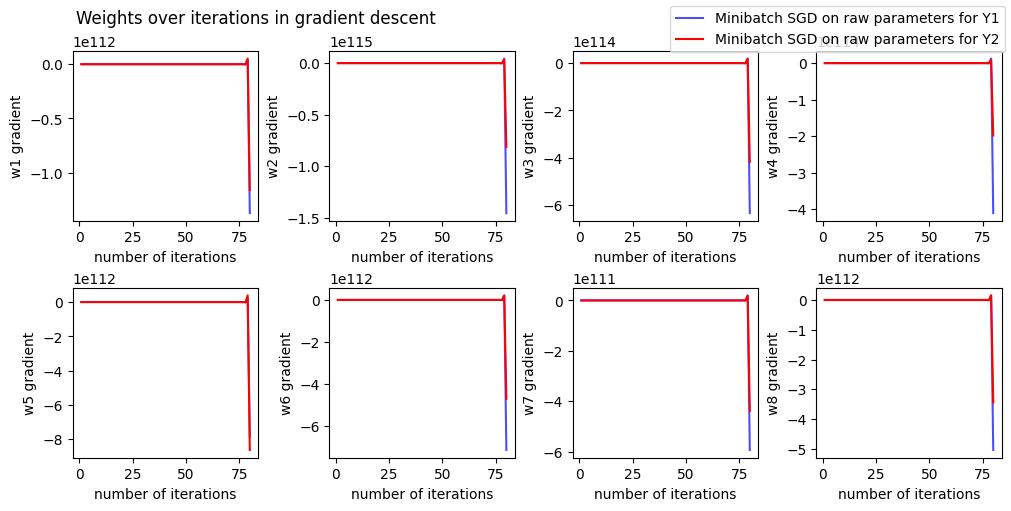

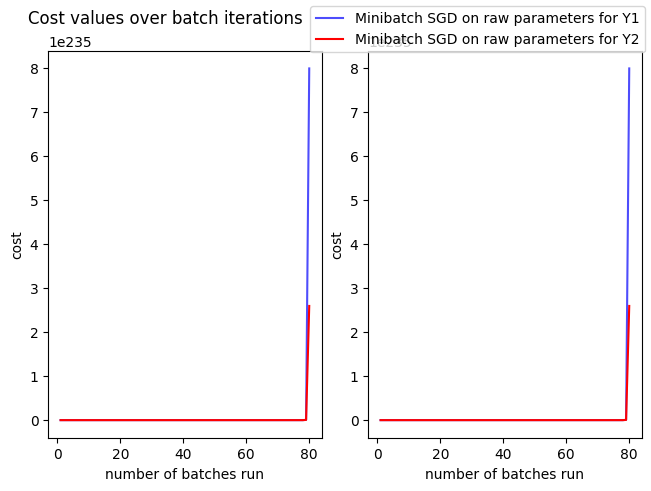

In [63]:
for hist, cost, desc in zip(w_hists_list, costs_list, descriptions_list):
    plotGradients(hist, cost, desc)

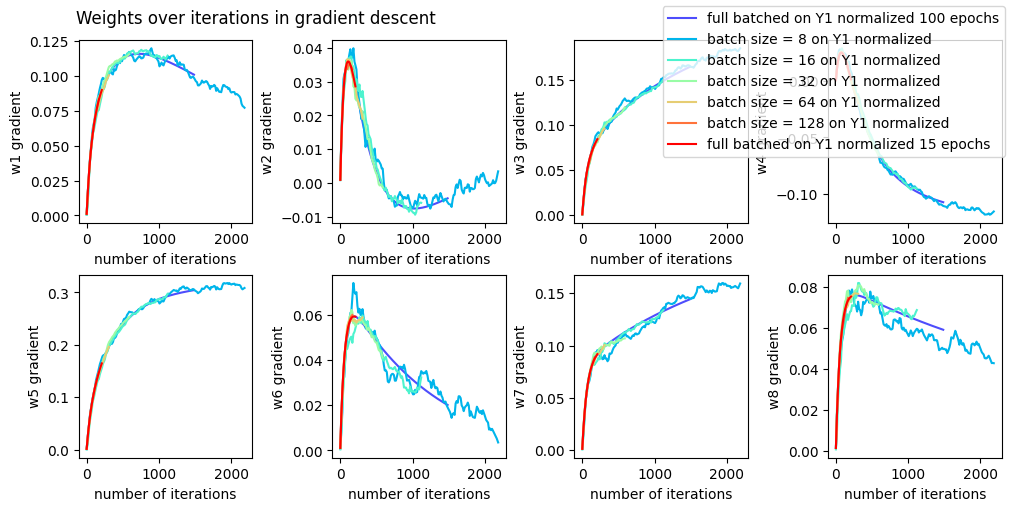

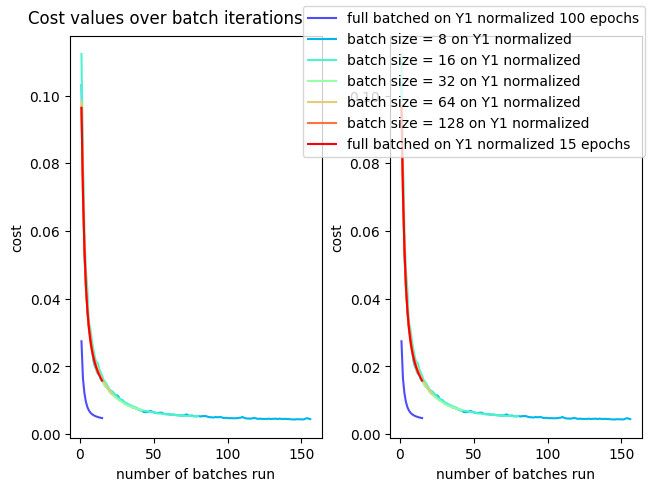

In [64]:
batchSizes = [8,16,32,64,128]

grads = []
costs = []
descriptions = []

sgd = SGD_LinearRegression()
grad = GradientDescent(max_iters=100, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd.fit(X, Y1, grad)
grads.append(grad.w_history)
costs.append(sgd.cost_history)
descriptions.append('full batched on Y1 normalized 100 epochs')

for batchsize in batchSizes:
    sgd = MiniBatch_SGD_LinearRegression(batch_size=batchsize, epochs=2)
    grad = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
    sgd.fit(X, Y1, grad, create_mini_batches)
    grads.append(grad.w_history)
    costs.append(sgd.cost_history)
    descriptions.append('batch size = {0} on Y1 normalized'.format(batchsize))
    

sgd = SGD_LinearRegression()
grad = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd.fit(X, Y1, grad)
grads.append(grad.w_history)
costs.append(sgd.cost_history)
descriptions.append('full batched on Y1 normalized 15 epochs')


plotGradients(grads, costs, descriptions)

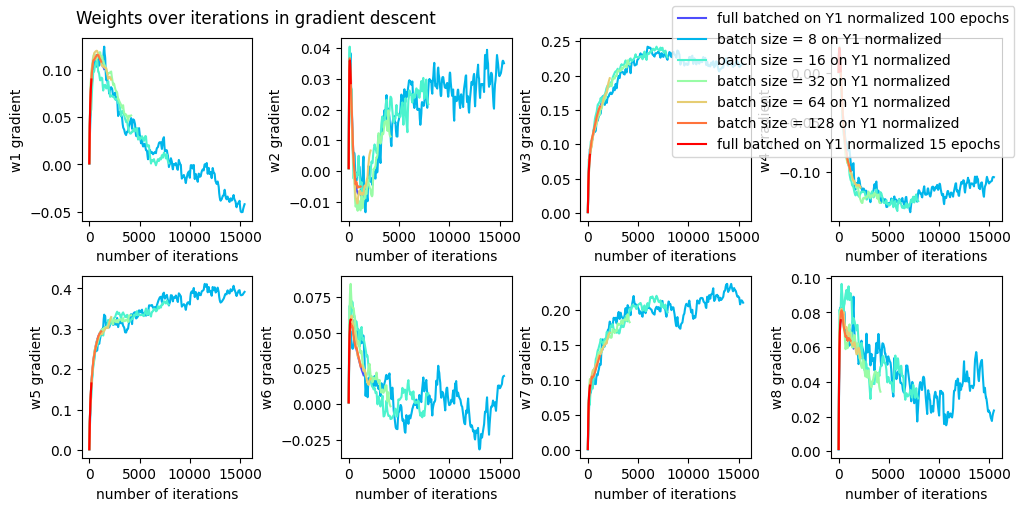

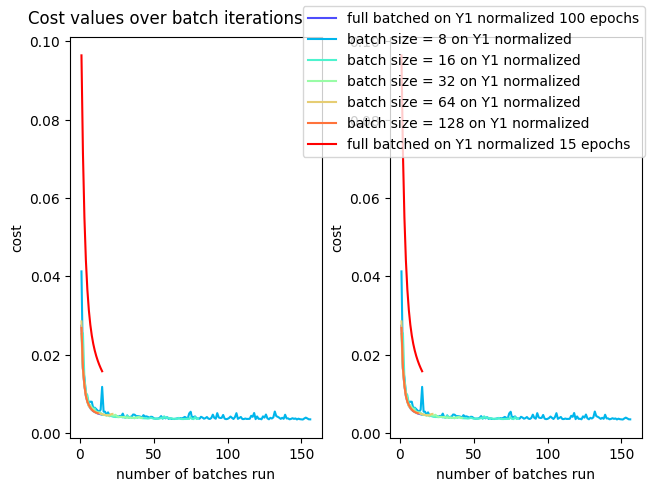

In [65]:
batchSizes = [8,16,32,64,128]

grads = []
costs = []
descriptions = []

sgd = SGD_LinearRegression()
grad = GradientDescent(max_iters=100, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd.fit(X, Y1, grad)
grads.append(grad.w_history)
costs.append(sgd.cost_history)
descriptions.append('full batched on Y1 normalized 100 epochs')

for batchsize in batchSizes:
    sgd = MiniBatch_SGD_LinearRegression(batch_size=batchsize, epochs=2)
    grad = GradientDescent(max_iters=100, learning_rate=1e-2, record_history=True, epsilon=1e-8)
    sgd.fit(X, Y1, grad, create_mini_batches)
    grads.append(grad.w_history)
    costs.append(sgd.cost_history)
    descriptions.append('batch size = {0} on Y1 normalized'.format(batchsize))
    

sgd = SGD_LinearRegression()
grad = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd.fit(X, Y1, grad)
grads.append(grad.w_history)
costs.append(sgd.cost_history)
descriptions.append('full batched on Y1 normalized 15 epochs')


plotGradients(grads, costs, descriptions)

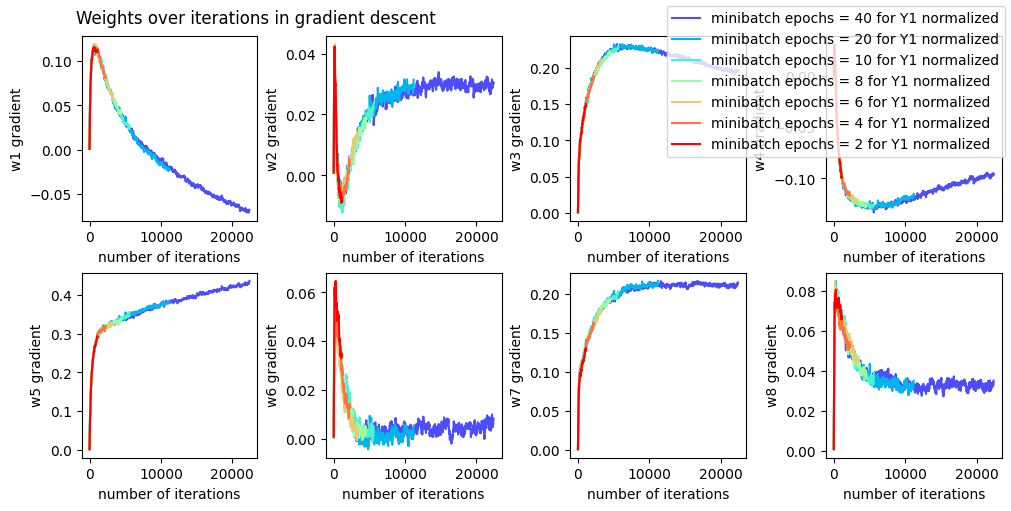

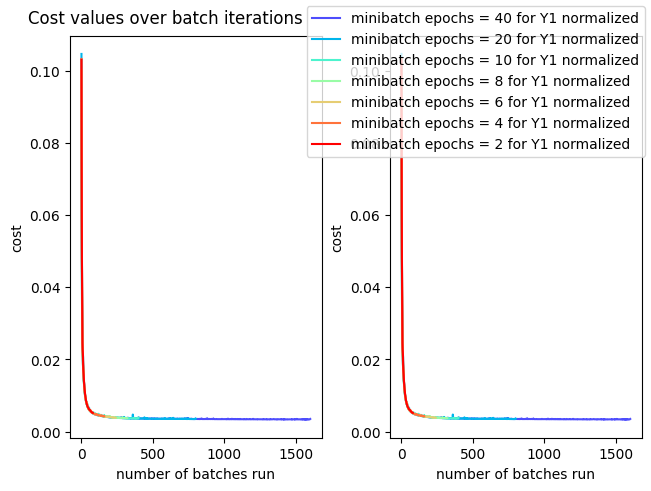

In [66]:
epochs = [2,4,6,8,10,20,40]
epochs.reverse()

grads = []
costs = []
descriptions = []
for epoch in epochs:
    sgd = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=epoch)
    grad = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
    sgd.fit(X, Y1, grad, create_mini_batches)
    costs.append(sgd.cost_history)
    grads.append(grad.w_history)
    descriptions.append('minibatch epochs = {0} for Y1 normalized'.format(epoch))
    

plotGradients(grads, costs, descriptions)

## Results/Testing

In [67]:
predictions_Y1 = sgd_Y1.predict(testX_Y1)

In [68]:
errorMiniSGD_Y1 = sse(predictions_Y1, testData[["Y1"]])
errorMiniSGD_Y1

Y1    0.004448
dtype: float64

In [69]:
predictions_Y2 = sgd_Y2.predict(testX_Y2)

In [70]:
errorMiniSGD_Y2 = sse(predictions_Y2, testData[["Y2"]])
errorMiniSGD_Y2

Y2    0.005542
dtype: float64

# Compare

In [71]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(lin_Y1.w)

[[-0.611555]
 [-11872616279664.251953]
 [6925692829804.055664]
 [8904462209747.710938]
 [0.407227]
 [-0.000977]
 [0.212402]
 [0.029785]
 [-1978769379943.384766]]


In [72]:
print(sgd_Y1.w)

[[0.109050]
 [-0.010203]
 [0.144893]
 [-0.099847]
 [0.290728]
 [0.030665]
 [0.136938]
 [0.068804]
 [0.119034]]


In [74]:
print('Linear Regression error: {0}, Minibatch SGD Linear Regression error: {1}'.format(float(error_lin_Y1), float(errorMiniSGD_Y1)))

Linear Regression error: 0.002745920159957213, Minibatch SGD Linear Regression error: 0.004447924838656886


In [75]:
print('Linear Regression final cost: {0}, Minibatch SGD Linear Regression final cost: {1}'.format((float(lin_Y1.cost)), float(sgd_Y1.final_cost)))

Linear Regression final cost: 0.0032632826408248907, Minibatch SGD Linear Regression final cost: 0.005180479133132095


Text(0.5, 0.98, 'Final costs for both Regressions on Y1')

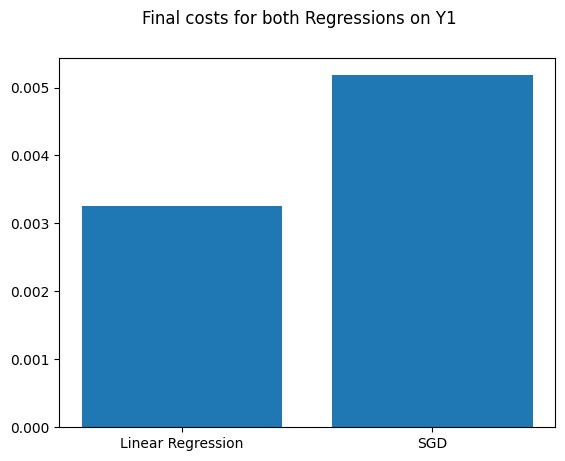

In [76]:
plt.bar(['Linear Regression', 'SGD'], [float(lin_Y1.cost), float(sgd_Y1.final_cost)])
plt.suptitle('Final costs for both Regressions on Y1')

# Experiments

## Growing training sets

(154, 9) (154, 1)
(154, 9) (154, 1)
(230, 9) (230, 1)
(230, 9) (230, 1)
(307, 9) (307, 1)
(307, 9) (307, 1)
(384, 9) (384, 1)
(384, 9) (384, 1)


C:\Users\trist\AppData\Local\Temp\ipykernel_12024\128179461.py:21: RuntimeWarning: invalid value encountered in divide
  grad = .5*np.dot(x.T, yh - y)/N
C:\Users\trist\AppData\Local\Temp\ipykernel_12024\128179461.py:21: RuntimeWarning: invalid value encountered in divide
  grad = .5*np.dot(x.T, yh - y)/N
C:\Users\trist\AppData\Local\Temp\ipykernel_12024\128179461.py:21: RuntimeWarning: invalid value encountered in divide
  grad = .5*np.dot(x.T, yh - y)/N
C:\Users\trist\AppData\Local\Temp\ipykernel_12024\128179461.py:21: RuntimeWarning: invalid value encountered in divide
  grad = .5*np.dot(x.T, yh - y)/N
C:\Users\trist\AppData\Local\Temp\ipykernel_12024\128179461.py:21: RuntimeWarning: invalid value encountered in divide
  grad = .5*np.dot(x.T, yh - y)/N
C:\Users\trist\AppData\Local\Temp\ipykernel_12024\128179461.py:21: RuntimeWarning: invalid value encountered in divide
  grad = .5*np.dot(x.T, yh - y)/N
C:\Users\trist\AppData\Local\Temp\ipykernel_12024\128179461.py:21: RuntimeWarning:

(461, 9) (461, 1)
(461, 9) (461, 1)
(538, 9) (538, 1)
(538, 9) (538, 1)
(614, 9) (614, 1)
(614, 9) (614, 1)


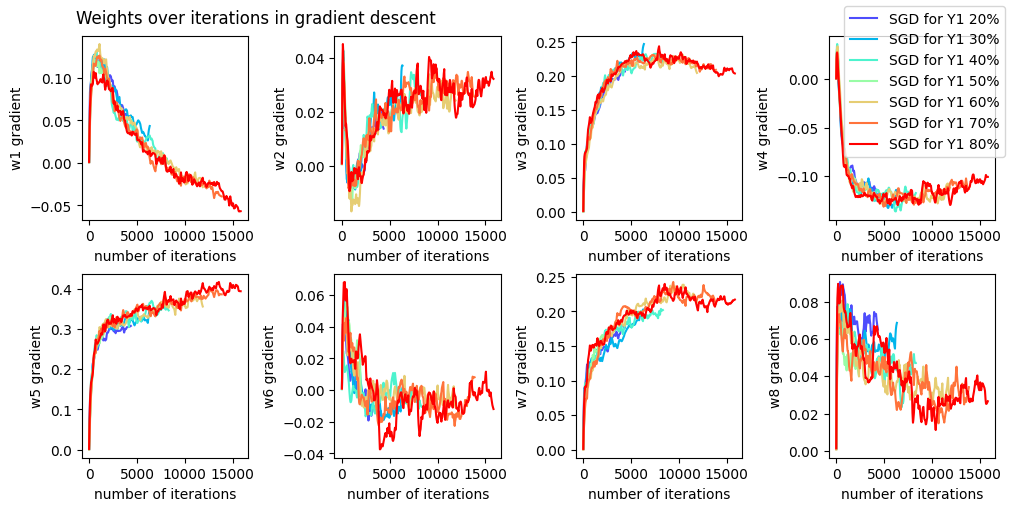

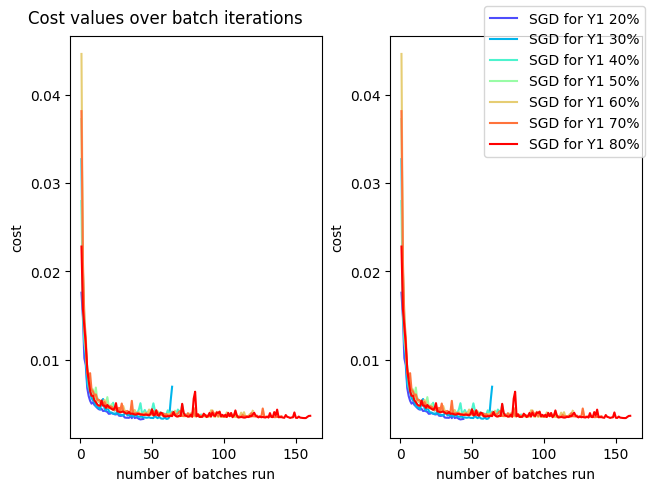

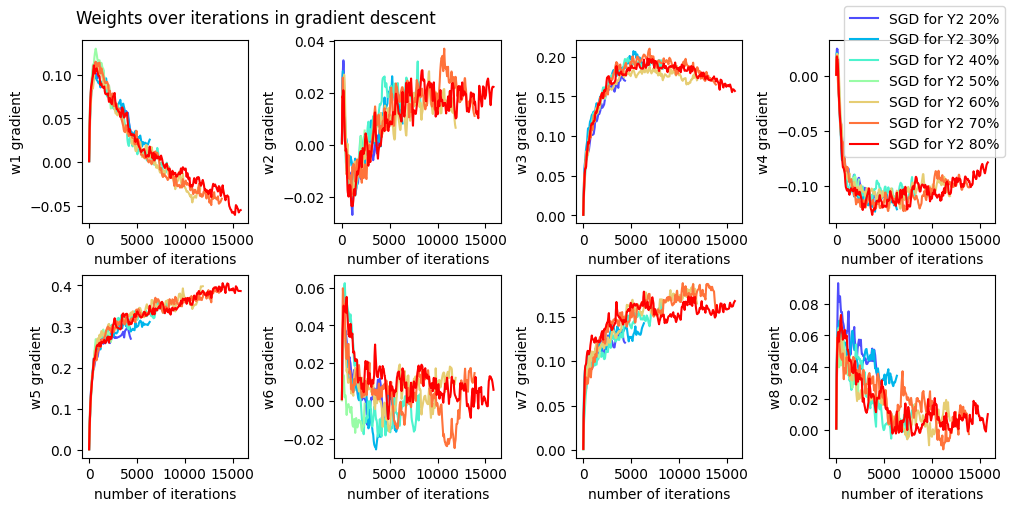

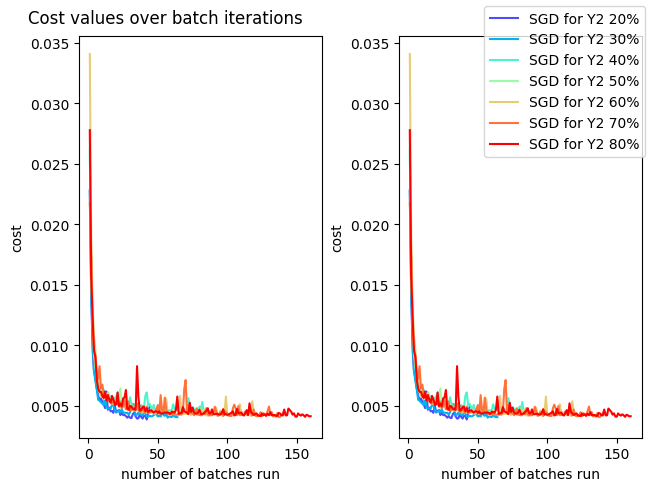

In [77]:
import math
fracs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

grads_Y1 = []
costs_Y1 = []
descs_Y1 = []
grads_Y2 = []
costs_Y2 = []
descs_Y2 = []
predictions_lin_Y1 = []
predictions_sgd_Y1 = []
predictions_lin_Y2 = []
predictions_sgd_Y2 = []
performance_test_lin_Y1 = []
performance_test_sgd_Y1 = []
performance_test_lin_Y2 = []
performance_test_sgd_Y2 = []

for frac in fracs:
    trainData = selectTrain(df=normedDf,frac=frac,random_state=40)
    testData = normedDf.drop(trainData.index)
    
    train_X = trainData.iloc[:, 0:8]
    test_X = testData.iloc[:, 0:8]
    train_Y1 = trainData[["Y1"]]
    test_Y1 = testData[["Y1"]]
    train_Y2 = trainData[["Y2"]]
    test_Y2 = testData[["Y2"]]
    
    lin_Y1 = LinearRegression()
    lin_Y2 = LinearRegression()
    sgd_Y1 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=4)
    grad_Y1 = GradientDescent(max_iters=100, learning_rate=1e-2, record_history=True, epsilon=1e-8)
    sgd_Y2 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=4)
    grad_Y2 = GradientDescent(max_iters=100, learning_rate=1e-2, record_history=True, epsilon=1e-8)
    lin_Y1.fit(train_X, train_Y1)
    predict_lin_Y1 = lin_Y1.predict(test_X)
    lin_Y2.fit(train_X, train_Y2)
    predict_lin_Y2 = lin_Y2.predict(test_X)
    sgd_Y1.fit(train_X, train_Y1, grad_Y1, create_mini_batches)
    sgd_Y2.fit(train_X, train_Y2, grad_Y2, create_mini_batches)
    prediction_sgd_Y1 = sgd_Y1.predict(test_X)
    prediction_sgd_Y2 = sgd_Y2.predict(test_X)

    grads_Y1.append(grad_Y1.w_history)
    grads_Y2.append(grad_Y2.w_history)
    
    costs_Y1.append(sgd_Y1.cost_history)
    costs_Y2.append(sgd_Y2.cost_history)
    
    descs_Y1.append(f'SGD for Y1 {frac:.0%}')
    descs_Y2.append(f'SGD for Y2 {frac:.0%}')
    
    predictions_lin_Y1.append((predict_lin_Y1, f'{frac:.0%}', test_Y1))
    predictions_sgd_Y1.append((prediction_sgd_Y1, f'{frac:.0%}', test_Y1))
    performance_test_lin_Y1.append((lin_Y1.cost, f'{frac:.0%}'))
    performance_test_sgd_Y1.append((sgd_Y1.final_cost, f'{frac:.0%}'))
    predictions_lin_Y2.append((predict_lin_Y2, f'{frac:.0%}', test_Y2))
    predictions_sgd_Y2.append((prediction_sgd_Y2, f'{frac:.0%}', test_Y2))
    performance_test_lin_Y2.append((lin_Y2.cost, f'{frac:.0%}'))
    performance_test_sgd_Y2.append((sgd_Y2.final_cost, f'{frac:.0%}'))

plotGradients(grads_Y1, costs_Y1, descs_Y1)
plotGradients(grads_Y2, costs_Y2, descs_Y2)

['20%', '30%', '40%', '50%', '60%', '70%', '80%']
['20%', '30%', '40%', '50%', '60%', '70%', '80%']


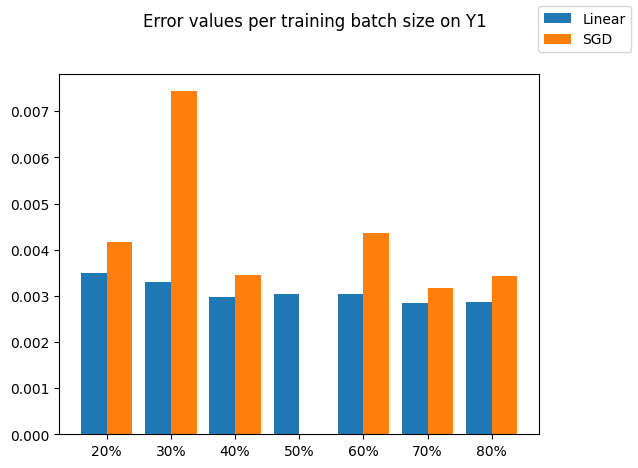

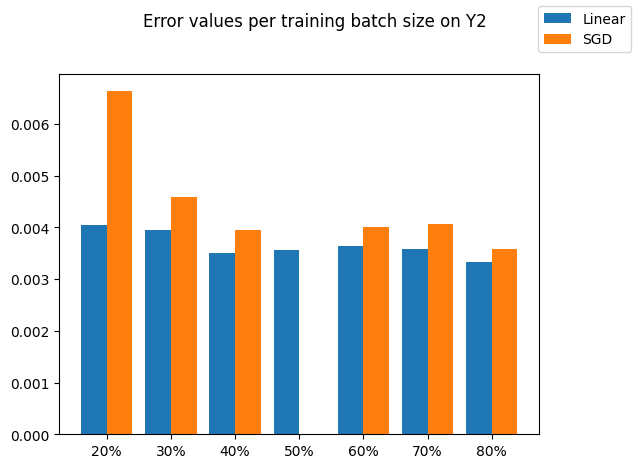

In [78]:
errors_lin_Y1 = []
errors_lin_Y2 = []
errors_sgd_Y1 = []
errors_sgd_Y2 = []

def addErrors(predictions, errors):
    for pred in predictions:
        errors.append((pred[1], float(sse(pred=pred[0], actual=pred[2]))))
addErrors(predictions_lin_Y1, errors_lin_Y1)
addErrors(predictions_sgd_Y1, errors_sgd_Y1)
addErrors(predictions_lin_Y2, errors_lin_Y2)
addErrors(predictions_sgd_Y2, errors_sgd_Y2)
    
# print([x[1] for x in errors_Y1])
# plt.show()

def plotErrorHistogram(error_list, dataset='Y1'):    
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.75,0.75])
    x_vals = [x[0] for x in error_list[0]]
    y_vals_1 = [0 if (math.isnan(float(x[1])) == True) else x[1] for x in error_list[0]]
    y_vals_2 = [0 if (math.isnan(float(x[1])) == True) else x[1] for x in error_list[1]]

    x_axis = np.arange(len(x_vals))
    print(x_vals)
    ax.bar(x_axis - 0.2, y_vals_1, 0.4, label = 'Linear')
    ax.bar(x_axis + 0.2, y_vals_2, 0.4, label = 'SGD')
    ax.set_xticks(x_axis, x_vals)
    fig.suptitle('Error values per training batch size on {0}'.format(dataset))
    fig.legend()
    fig.savefig('Lin_vs_sgd_{0}'.format(dataset))
    # for ax, errors in zip(axes, errors_list):
    #     # y_pos = np.arange(len(errors))
    #     y_vals_1 = [0 if (math.isnan(float(x[1])) == True) else x[1] for x in errors[0]]
    #     y_vals_2 = [0 if (math.isnan(float(x[1])) == True) else x[1] for x in errors[1]]
    #     print(y_vals_1)
    #     ax.hist([y_vals_1])
    #     ax.set_xticks(list(float(x[0].strip('%'))/100 for x in errors[0]), labels=[x[0] for x in errors[0]])
    #     # ax.set_xticks(errors[0], [x[1] for x in errors])
    # fig.set
    
# plotErrorHistogram([[errors_lin_Y1, errors_sgd_Y1], [errors_lin_Y2, errors_sgd_Y2]])
plotErrorHistogram([errors_lin_Y1, errors_sgd_Y1], dataset='Y1')
plotErrorHistogram([errors_lin_Y2, errors_sgd_Y2], dataset='Y2')

# plt.show()

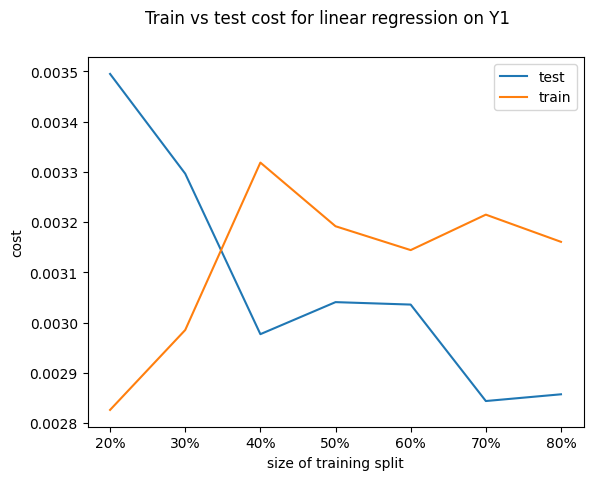

In [79]:
x_vals = [x[0] for x in errors_lin_Y1]
y_vals_train = [float(x[0]) for x in performance_test_lin_Y1]
y_vals_test = [0 if (math.isnan(float(x[1])) == True) else x[1] for x in errors_lin_Y1]
plt.plot(x_vals, y_vals_test, label='test')
plt.plot(x_vals, y_vals_train, label='train')
plt.legend()
plt.xlabel('size of training split')
plt.ylabel('cost')
plt.suptitle('Train vs test cost for linear regression on Y1')
plt.savefig('test_v_train_Y1_lin')

## Different learning rates

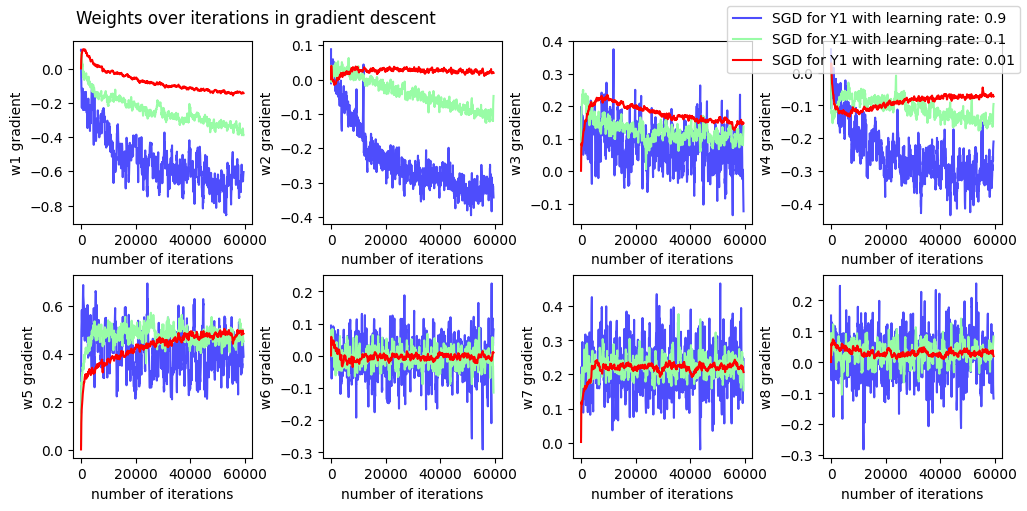

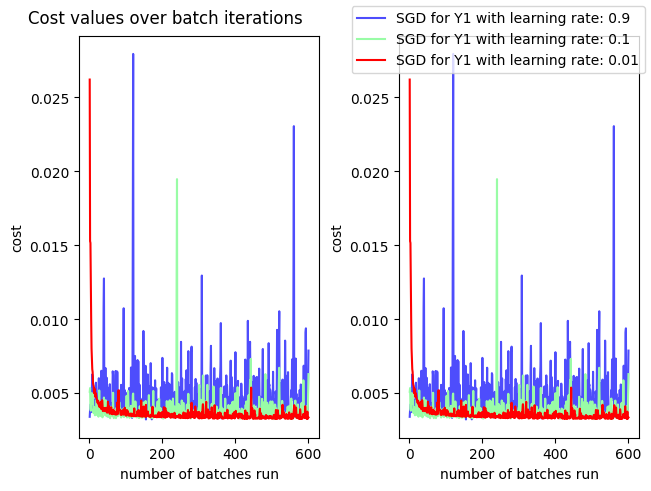

In [80]:
learning_rates = [0.9, 0.1, 0.01]

grads_Y1 = []
costs_Y1 = []
descs_Y1 = []
grads_Y2 = []
costs_Y2 = []
descs_Y2 = []
predictions_sgd_Y1 = []
predictions_sgd_Y2 = []
performance_test_sgd_Y1 = []
performance_test_sgd_Y2 = []

for rate in learning_rates:
    trainData = selectTrain(df=normedDf,frac=0.8,random_state=40)
    testData = normedDf.drop(trainData.index)
    
    train_X = trainData.iloc[:, 0:8]
    test_X = testData.iloc[:, 0:8]
    train_Y1 = trainData[["Y1"]]
    test_Y1 = testData[["Y1"]]
    train_Y2 = trainData[["Y2"]]
    test_Y2 = testData[["Y2"]]

    sgd_Y1 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=15)
    grad_Y1 = GradientDescent(max_iters=100, learning_rate=rate, record_history=True, epsilon=1e-8)
    sgd_Y2 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=15)
    grad_Y2 = GradientDescent(max_iters=100, learning_rate=rate, record_history=True, epsilon=1e-8)
    sgd_Y1.fit(train_X, train_Y1, grad_Y1, create_mini_batches)
    sgd_Y2.fit(train_X, train_Y2, grad_Y2, create_mini_batches)
    prediction_sgd_Y1 = sgd_Y1.predict(test_X)
    prediction_sgd_Y2 = sgd_Y2.predict(test_X)

    grads_Y1.append(grad_Y1.w_history)
    grads_Y2.append(grad_Y2.w_history)
    
    costs_Y1.append(sgd_Y1.cost_history)
    costs_Y2.append(sgd_Y2.cost_history)
    
    descs_Y1.append(f'SGD for Y1 with learning rate: {rate}')
    descs_Y2.append(f'SGD for Y2 with learning rate: {rate}')
    
    predictions_sgd_Y1.append((prediction_sgd_Y1, f'{frac:.0%}', test_Y1))
    performance_test_sgd_Y1.append((sgd_Y1.final_cost, f'{frac:.0%}'))
    predictions_sgd_Y2.append((prediction_sgd_Y2, f'{frac:.0%}', test_Y2))
    performance_test_sgd_Y2.append((sgd_Y2.final_cost, f'{frac:.0%}'))

plotGradients(grads_Y1, costs_Y1, descs_Y1)